General Information

Importing the libraries and data

In [728]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

In [729]:
import category_encoders as ce

In [730]:
df = pd.read_excel('Work Schedule Predictive.xlsx')

Data Overview

In [731]:
df.head()

,Housheold ID,Roster ID of RSI Respondent,Gender,Age,Area,Number of household members,Hours spend on domestic work last weekday,Hours spend on domestic work last Saturday,Hours spend on domestic work last Sunday,Wealth quintiles,Wealth tertiles,Depression index for RSI respondent,Quintile of depression index for RSI respondent,Child domestic status
0,1001_1309,NaN,Female,28,Urban,3,NaN,NaN,NaN,High wealth,Mid third,-2.595528,Highest depressed,NaN
1,1001_1309,NaN,Male,30,Urban,3,NaN,NaN,NaN,High wealth,Mid third,-2.595528,Highest depressed,NaN
2,1001_1309,3.0,Female,17,Urban,3,5.0,4.0,2.0,High wealth,Mid third,-2.595528,Highest depressed,Non-servant child
3,1002_1374,NaN,Female,46,Urban,4,NaN,NaN,NaN,Medium wealth,Mid third,0.182001,High depressed,NaN
4,1002_1374,NaN,Male,22,Urban,4,NaN,NaN,NaN,Medium wealth,Mid third,0.182001,High depressed,NaN


In [732]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 14 columns):
Housheold ID                                       10876 non-null object
Roster ID of RSI Respondent                        1640 non-null float64
Gender                                             10876 non-null object
Age                                                10875 non-null object
Area                                               10876 non-null object
Number of household members                        10876 non-null int64
Hours spend on domestic work last weekday          3479 non-null float64
Hours spend on domestic work last Saturday         3480 non-null float64
Hours spend on domestic work last Sunday           3492 non-null float64
Wealth quintiles                                   10876 non-null object
Wealth tertiles                                    10876 non-null object
Depression index for RSI respondent                7614 non-null float64
Quintile of depr

In [733]:
df.describe()

,Roster ID of RSI Respondent,Number of household members,Hours spend on domestic work last weekday,Hours spend on domestic work last Saturday,Hours spend on domestic work last Sunday,Depression index for RSI respondent
count,1640.000000,10876.000000,3479.000000,3480.000000,3492.000000,7614.000000
mean,4.550610,6.354726,1.694452,2.329023,1.523196,0.001433
std,1.869736,2.635103,1.942696,2.449153,1.774862,1.001023
min,1.000000,1.000000,0.000000,0.000000,0.000000,-4.176166
25%,3.000000,4.000000,0.000000,0.000000,0.000000,-0.458841
50%,4.000000,6.000000,1.000000,2.000000,1.000000,0.425279
75%,6.000000,8.000000,3.000000,4.000000,2.000000,0.805088
max,17.000000,18.000000,20.000000,16.000000,15.000000,1.086250


In [734]:
df['Child domestic status'].value_counts(dropna=False)

NaN                       7372
Non-servant child         2777
Child domestic servant     727
Name: Child domestic status, dtype: int64

In [735]:
df['Roster ID of RSI Respondent'].value_counts(dropna=False)

NaN      9236
 3.0      417
 4.0      372
 5.0      295
 6.0      184
 2.0      137
 7.0      116
 8.0       57
 9.0       36
 10.0      14
 11.0       7
 17.0       2
 13.0       1
 1.0        1
 14.0       1
Name: Roster ID of RSI Respondent, dtype: int64

In [736]:
df = df[pd.notnull(df['Child domestic status'])]
df = df[pd.notnull(df['Roster ID of RSI Respondent'])]

In [737]:
df['Child domestic status'].value_counts(dropna=False)

Non-servant child         1125
Child domestic servant     496
Name: Child domestic status, dtype: int64

In [738]:
df['Roster ID of RSI Respondent'].value_counts(dropna=False)

3.0     413
4.0     367
5.0     293
6.0     182
2.0     135
7.0     114
8.0      56
9.0      35
10.0     14
11.0      7
17.0      2
1.0       1
14.0      1
13.0      1
Name: Roster ID of RSI Respondent, dtype: int64

In [739]:
pp.ProfileReport(df)

Number of variables,15
Number of observations,1621
Total Missing (%),2.9%
Total size in memory,190.0 KiB
Average record size in memory,120.0 B
Numeric,8
Categorical,6
Boolean,0
Date,0
Text (Unique),1
Rejected,0


Feature Analysis

In [740]:
df.columns

Index(['Housheold ID', 'Roster ID of RSI Respondent', 'Gender', 'Age', 'Area',
       'Number of household members',
       'Hours spend on domestic work last weekday',
       'Hours spend on domestic work last Saturday',
       'Hours spend on domestic work last Sunday', 'Wealth quintiles',
       'Wealth tertiles', 'Depression index for RSI respondent',
       'Quintile of depression index for RSI respondent',
       'Child domestic status'],
      dtype='object')

In [741]:
df = df.rename(index=str, columns={"Child domestic status": "CDS", 'Quintile of depression index for RSI respondent':'Depression Quintile', 'Depression index for RSI respondent':'Depression Index'})
df.head(0)

,Housheold ID,Roster ID of RSI Respondent,Gender,Age,Area,Number of household members,Hours spend on domestic work last weekday,Hours spend on domestic work last Saturday,Hours spend on domestic work last Sunday,Wealth quintiles,Wealth tertiles,Depression Index,Depression Quintile,CDS


In [742]:
df['Work_Schedule'] = df['Hours spend on domestic work last Saturday']+df['Hours spend on domestic work last Sunday']+ df['Hours spend on domestic work last weekday']

In [743]:
df = df.drop(['Hours spend on domestic work last Saturday', 'Hours spend on domestic work last weekday', 'Hours spend on domestic work last Sunday'], axis=1)
df.head()

,Housheold ID,Roster ID of RSI Respondent,Gender,Age,Area,Number of household members,Wealth quintiles,Wealth tertiles,Depression Index,Depression Quintile,CDS,Work_Schedule
2,1001_1309,3.0,Female,17,Urban,3,High wealth,Mid third,-2.595528,Highest depressed,Non-servant child,11.0
5,1002_1374,3.0,Male,15,Urban,4,Medium wealth,Mid third,0.182001,High depressed,Non-servant child,4.0
9,1003_1326,3.0,Male,17,Urban,3,Highest wealth,Rich third,0.445996,Medium depressed,Non-servant child,2.0
16,1006_1312,4.0,Male,14,Urban,7,Highest wealth,Rich third,0.402885,Medium depressed,Child domestic servant,12.0
23,1007_1323,4.0,Female,8,Urban,5,Highest wealth,Rich third,-0.334131,High depressed,Non-servant child,3.0


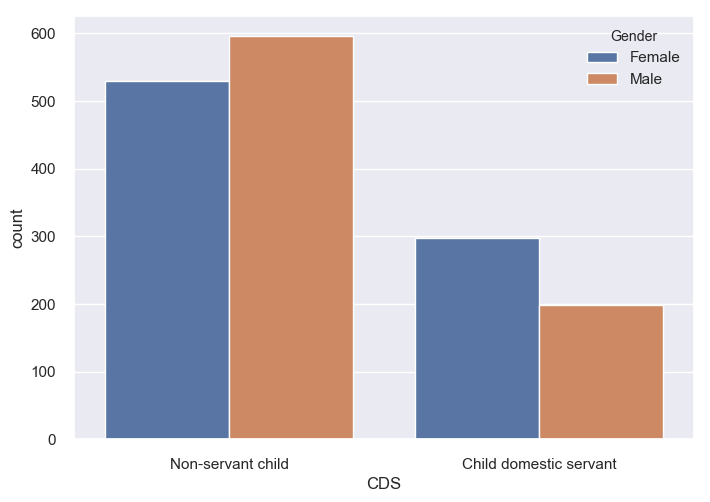

In [744]:
sns.set(font_scale=1)
ax = sns.countplot(x="CDS", hue="Gender", data=df)

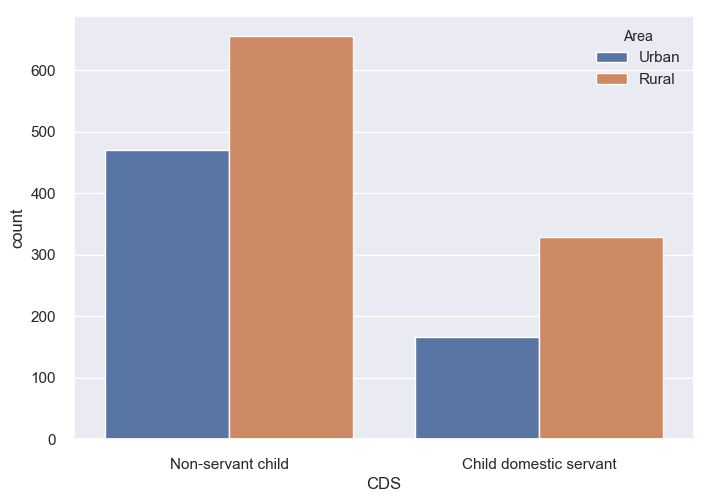

In [745]:
sns.set(font_scale=1)
ax = sns.countplot(x="CDS", hue="Area", data=df)

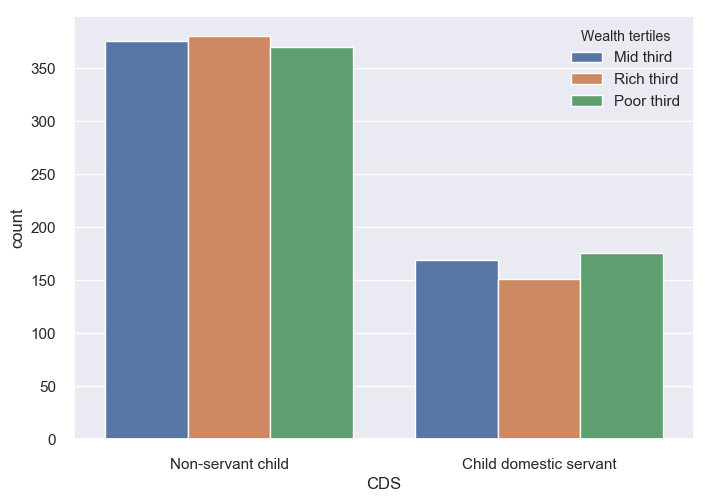

In [746]:
sns.set(font_scale=1)
ax = sns.countplot(x="CDS", hue="Wealth tertiles", data=df)

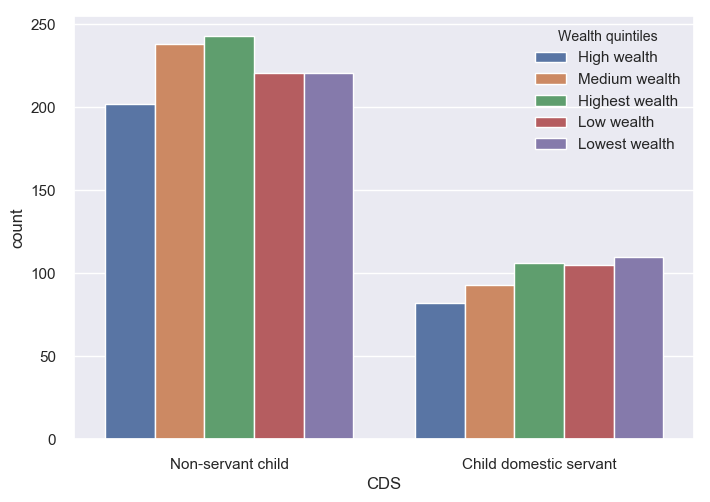

In [747]:
sns.set(font_scale=1)
ax = sns.countplot(x="CDS", hue="Wealth quintiles", data=df)

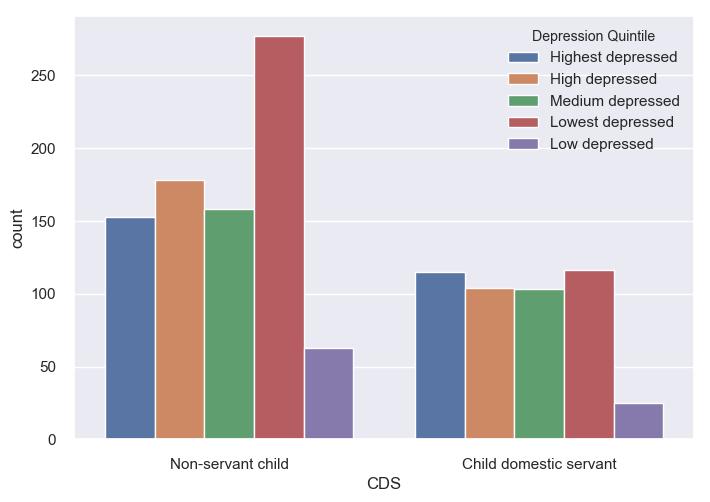

In [748]:
sns.set(font_scale=1)
ax = sns.countplot(x="CDS", hue="Depression Quintile", data=df)

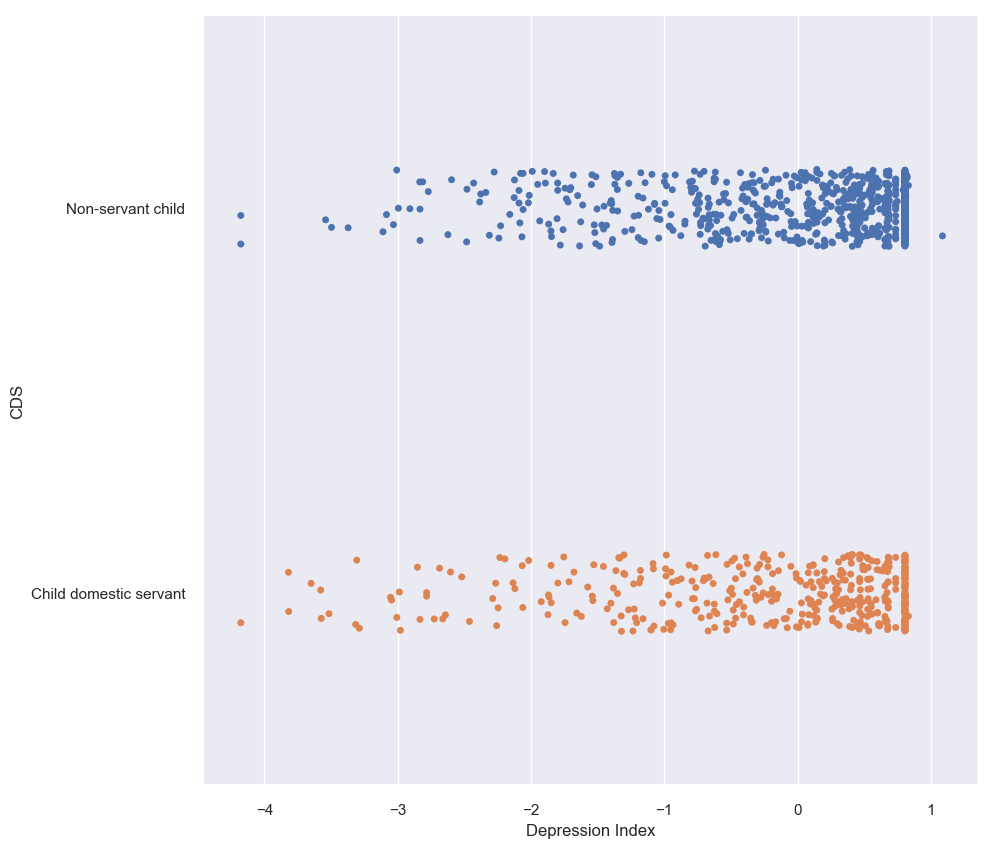

In [749]:
fig, ax = plt.subplots(figsize = (10,10))
sns.stripplot(y="CDS", x="Depression Index", data=df, jitter=True)

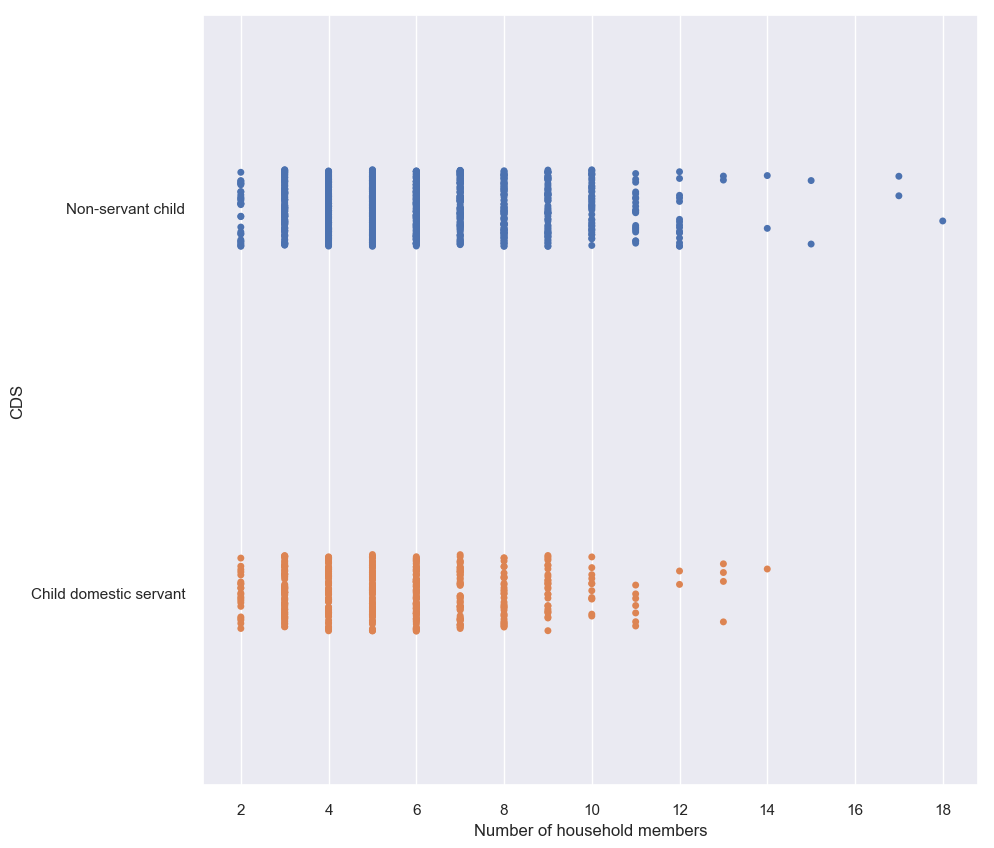

In [750]:
fig, ax = plt.subplots(figsize = (10,10))
sns.stripplot(y="CDS", x="Number of household members", data=df, jitter=True)

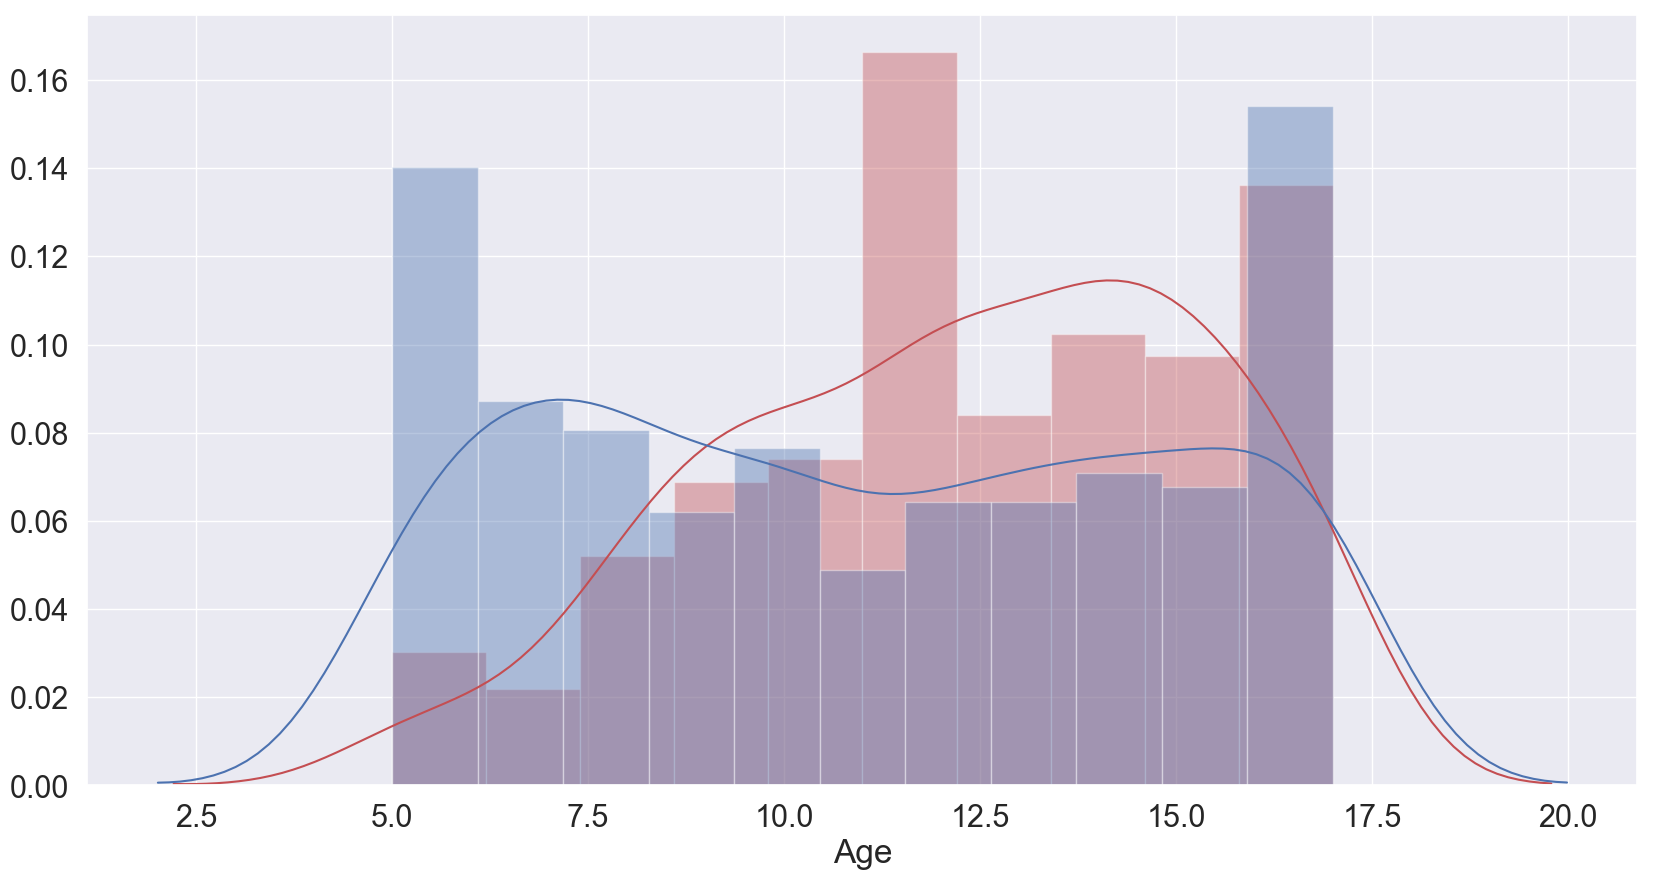

In [751]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.distplot(df[df['CDS'] == 'Child domestic servant'].Age,color='r')#, hist=False)
sns.distplot(df[df['CDS'] == 'Non-servant child'].Age,color='b')#, hist=False)

Temporarily removing null values to visualize distribution.

In [752]:
df1 = df[df['Work_Schedule'].notnull()]

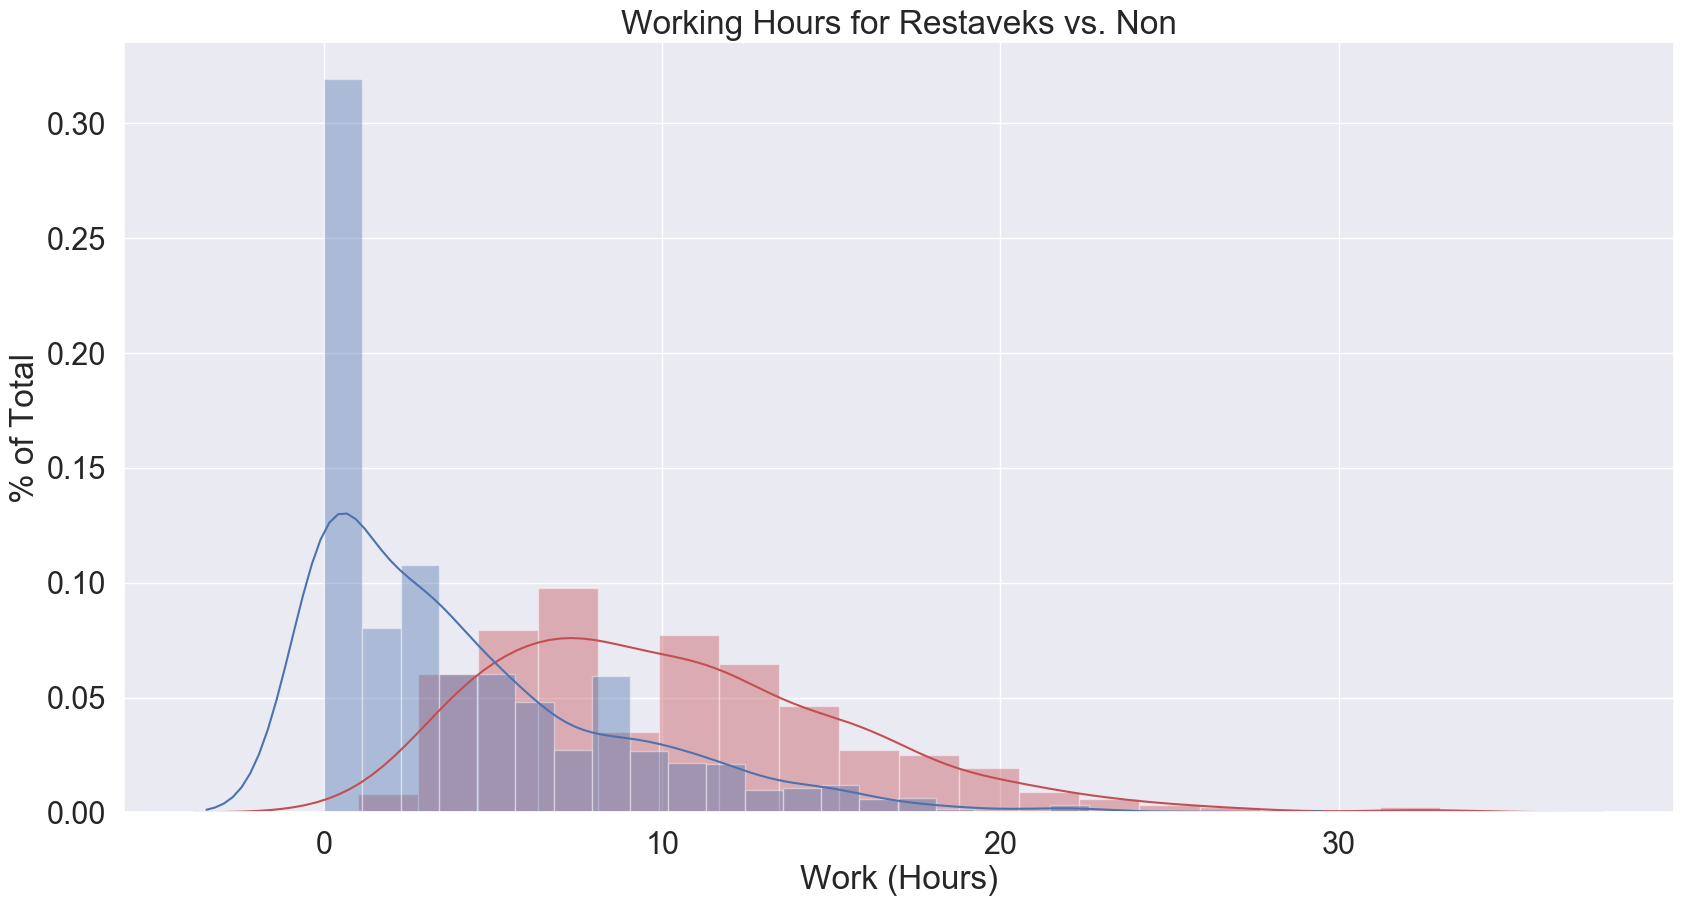

In [753]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.distplot(df1[df1['CDS'] == 'Child domestic servant'].Work_Schedule,color='r')#, hist=False)
sns.distplot(df1[df1['CDS'] == 'Non-servant child'].Work_Schedule,color='b')#, hist=False)
plt.xlabel("Work (Hours)")
plt.ylabel("% of Total")
plt.title("Working Hours for Restaveks vs. Non")

In [754]:
df.pivot_table(values=['Work_Schedule'], columns=['CDS'])

CDS,Child domestic servant,Non-servant child
Work_Schedule,10.284274,4.159091


In [755]:
df['Work_Schedule'] = df['Work_Schedule'].fillna(df['Work_Schedule'].mean())

We will now try to find deeper relationships between the variables.

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


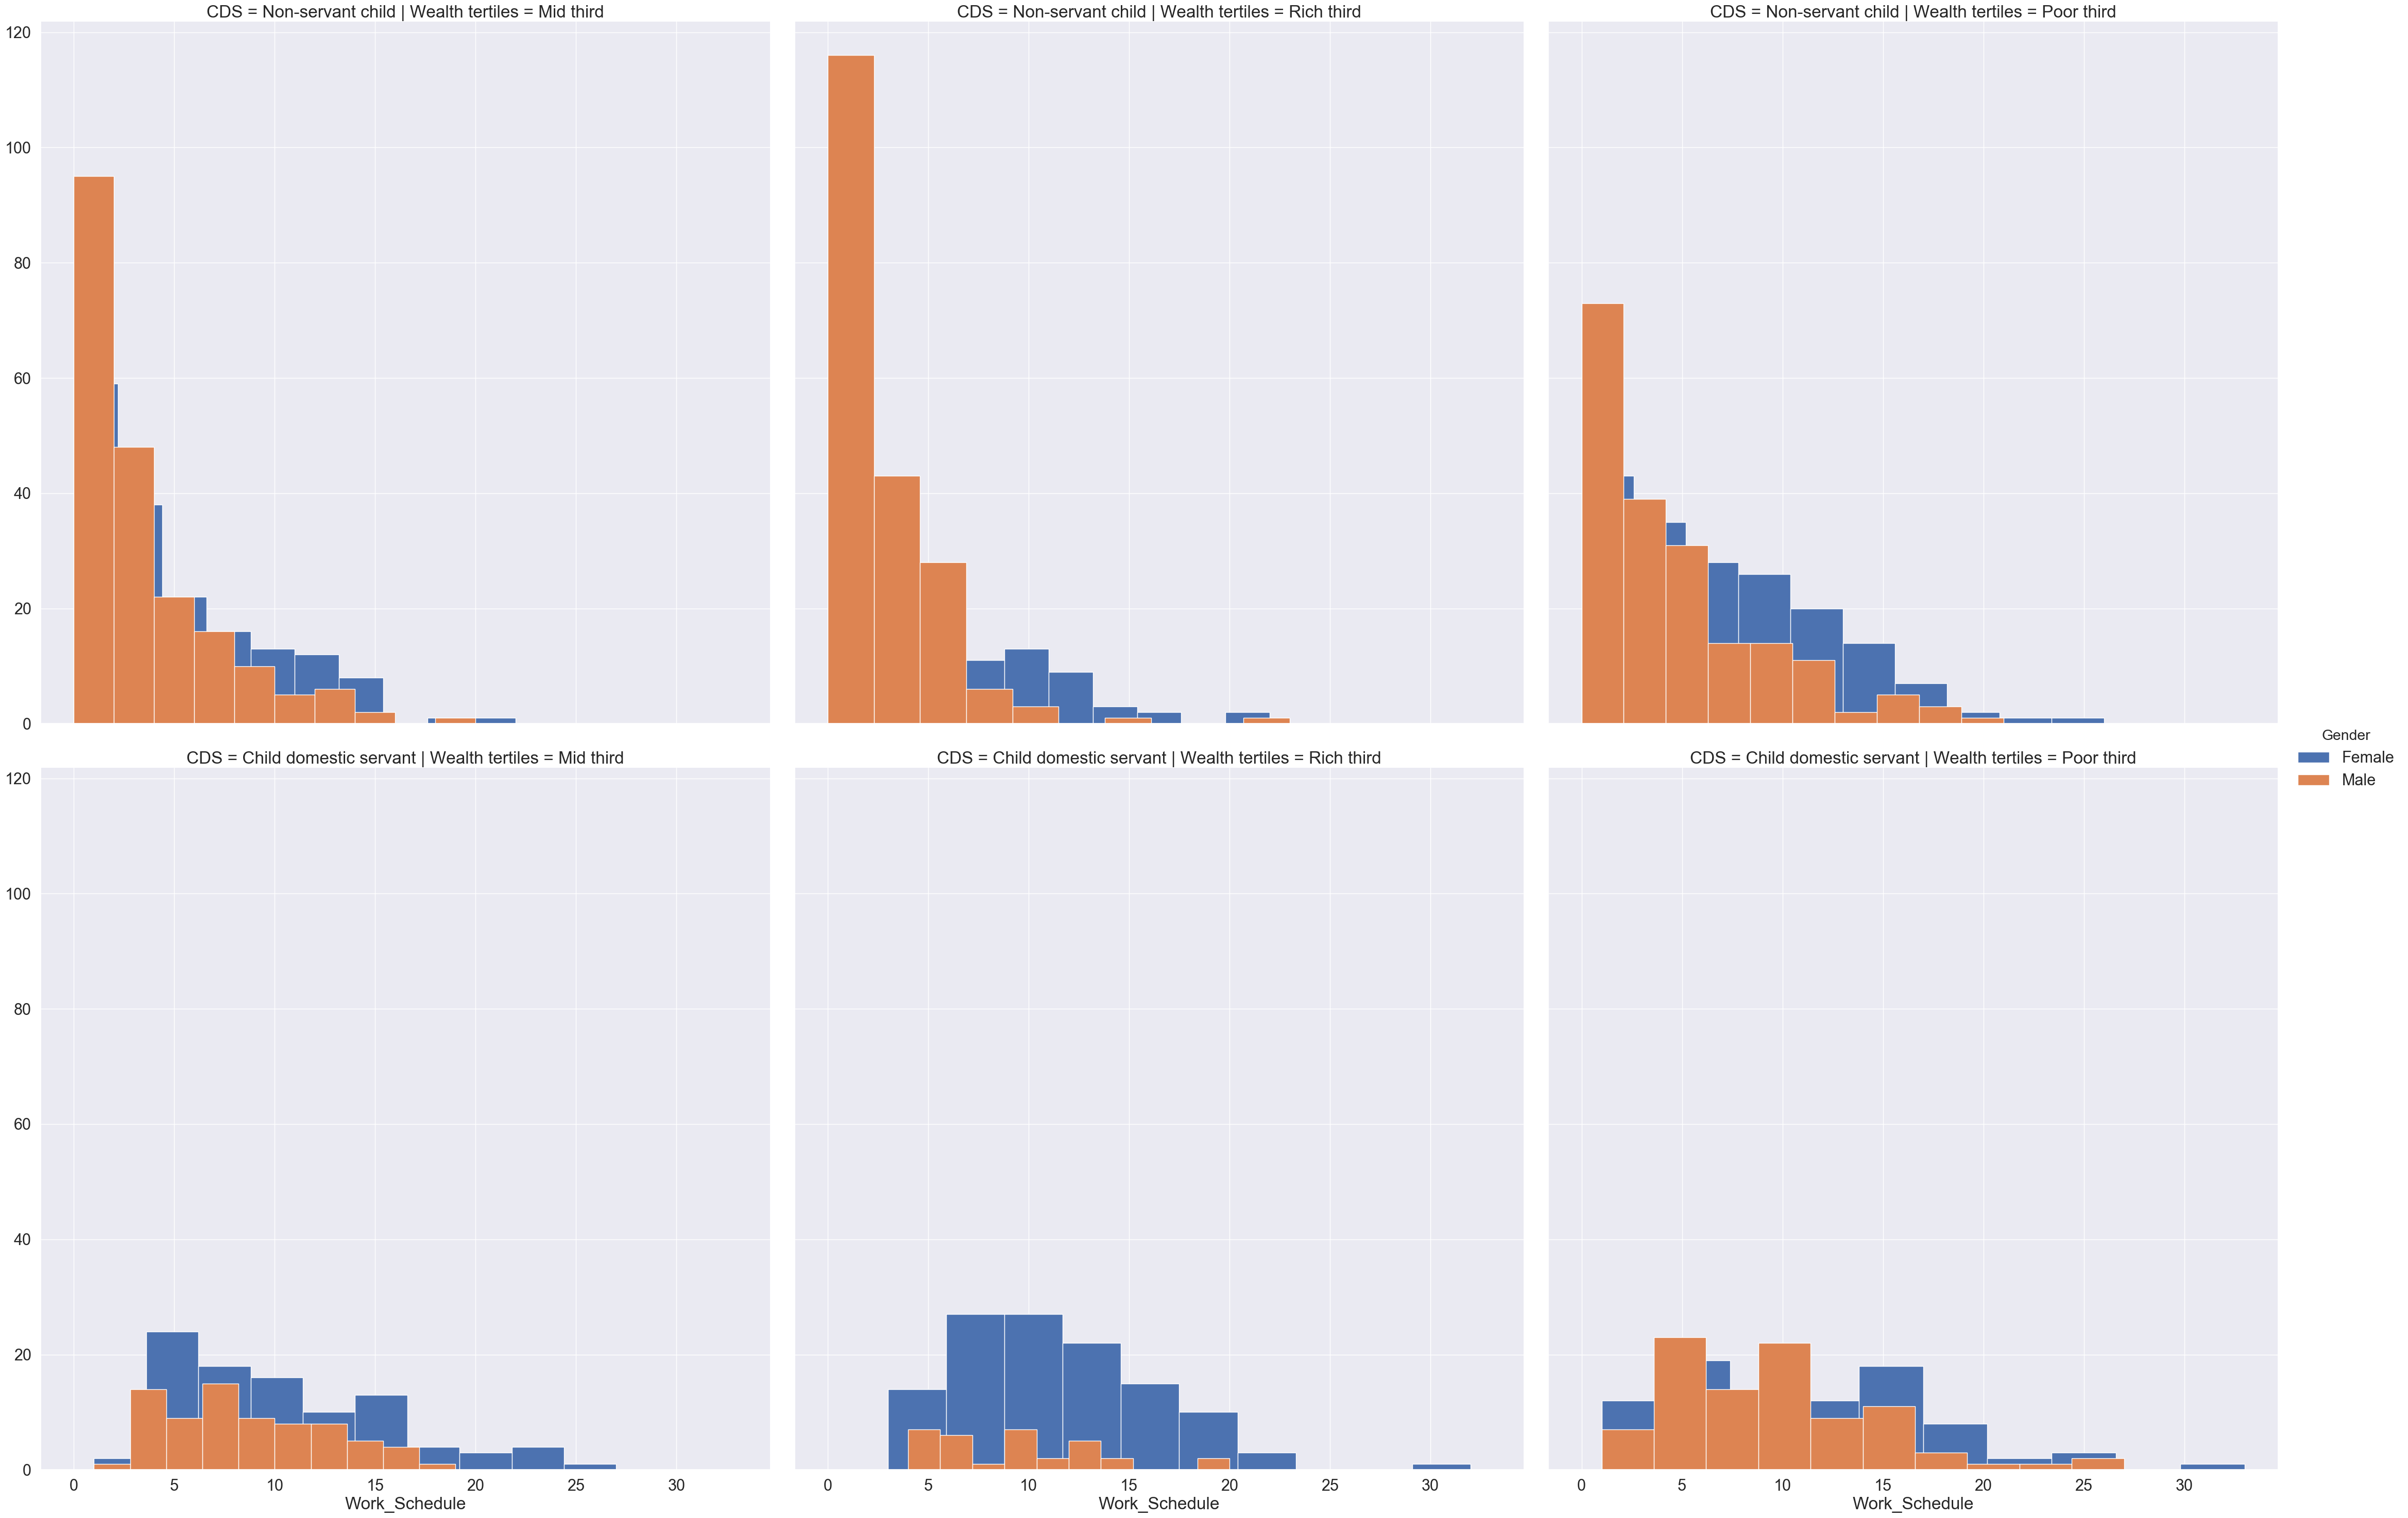

In [756]:
g = sns.FacetGrid(df, col="Wealth tertiles",  row="CDS",hue='Gender',size=15)
g = g.map(plt.hist, "Work_Schedule").add_legend()
sns.set(font_scale=3)

In [757]:
g = sns.FacetGrid(df, col="Wealth quintiles",  row="CDS",hue='Gender',size=25)
g = g.map(plt.hist, "Work_Schedule").add_legend()
sns.set(font_scale=3)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [758]:
sns.set(font_scale=1)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


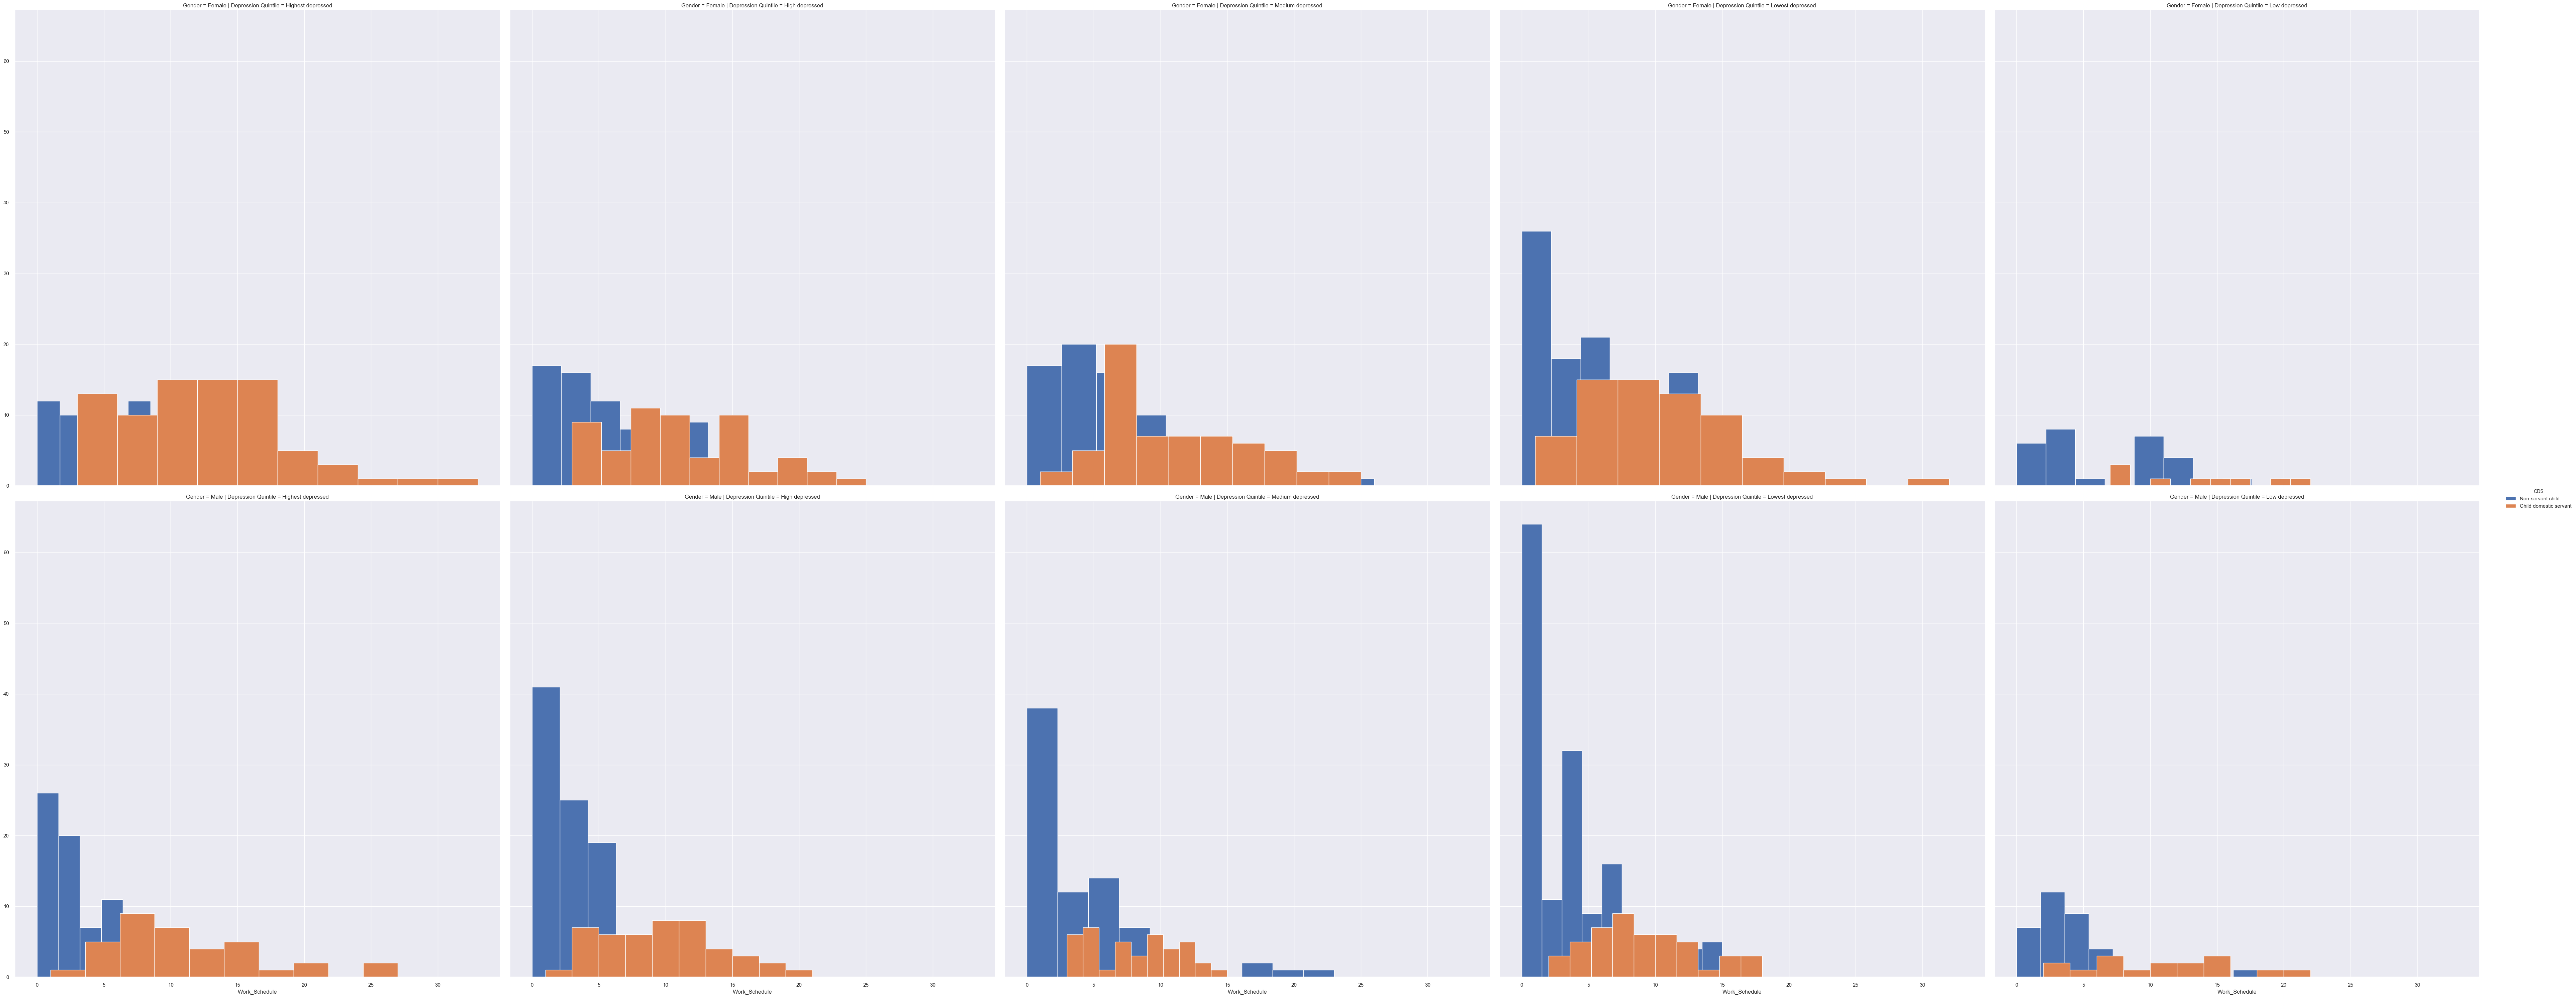

In [759]:
g = sns.FacetGrid(df, col="Depression Quintile",  row="Gender",hue='CDS', size=15)
g = g.map(plt.hist, "Work_Schedule").add_legend()

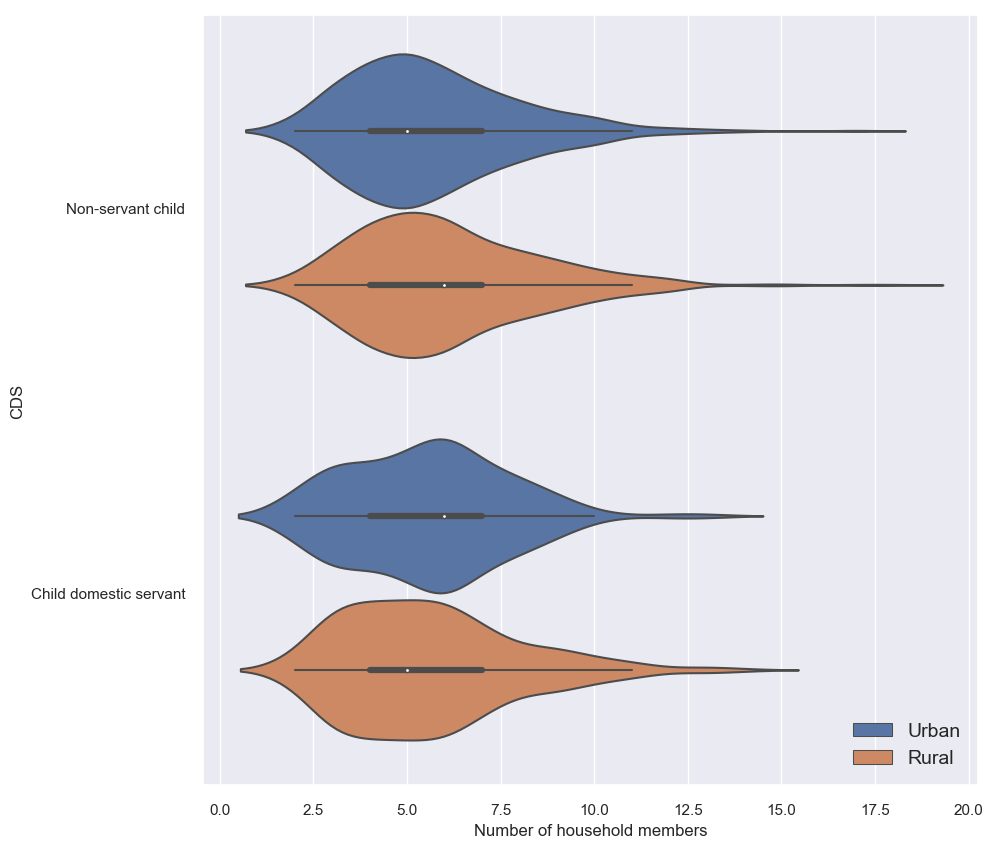

In [760]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y="CDS", x="Number of household members", hue='Area',data=df, jitter=True)
ax.legend(loc = 'lower right',prop={'size':14})

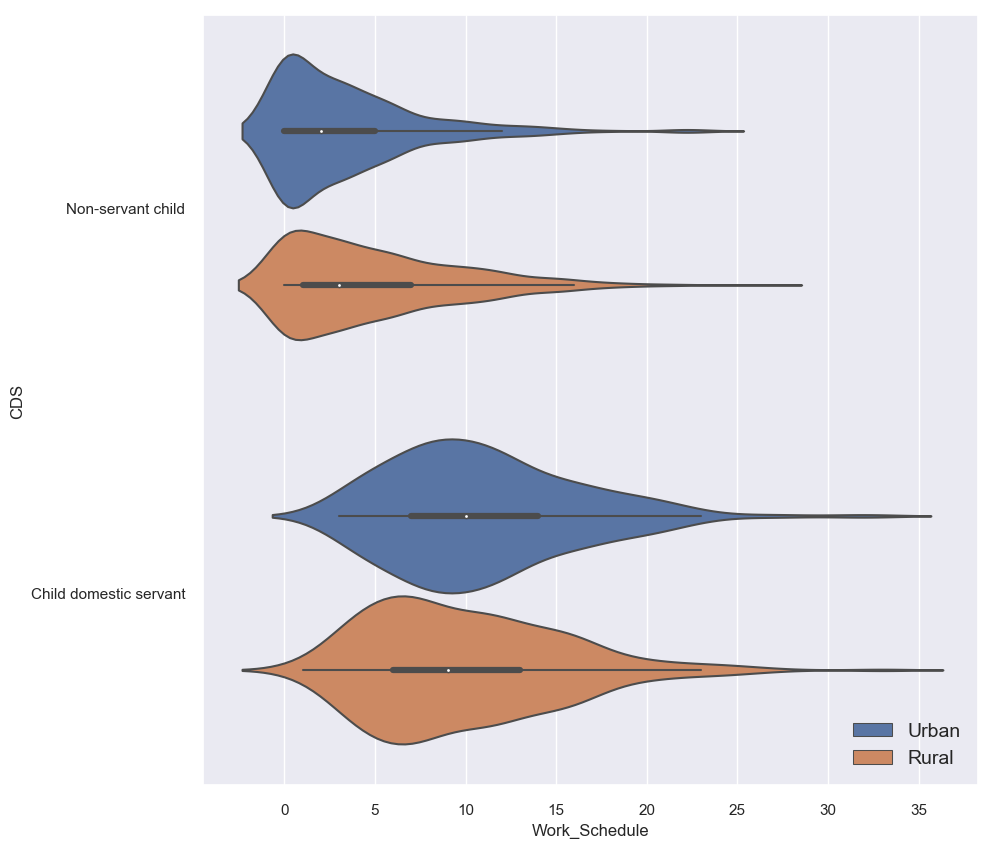

In [761]:
fig, ax = plt.subplots(figsize = (10,10))
sns.violinplot(y="CDS", x="Work_Schedule", hue='Area',data=df, jitter=True)
ax.legend(loc = 'lower right',prop={'size':14})

In [762]:
df.pivot_table(values=['Depression Quintile'], columns=['Age'], aggfunc='count')

Age,5,6,7,8,9,10,11,12,13,14,15,16,17
Depression Quintile,0,0,0,128,115,136,99,135,127,146,140,133,133


In [763]:
df.pivot_table(values=['Depression Index'], columns=['Age'], aggfunc='count')

Age,5,6,7,8,9,10,11,12,13,14,15,16,17
Depression Index,0,0,0,128,115,136,99,135,127,146,140,133,133


In [764]:
df['Depression Index'].median()

0.4252787020430555

In [765]:
df[df['Depression Index']==0.0842103293519231]

,Housheold ID,Roster ID of RSI Respondent,Gender,Age,Area,Number of household members,Wealth quintiles,Wealth tertiles,Depression Index,Depression Quintile,CDS,Work_Schedule
591,1315_2080,2.0,Male,13,Rural,2,Lowest wealth,Poor third,0.08421,High depressed,Non-servant child,1.0


In [766]:
df_CDS = df[df['CDS']=='Child domestic servant'] 

In [767]:
df_Non = df[df['CDS']=='Non-servant child'] 

In [768]:
np.max(df[df['Depression Index'] < 0.0842103293519231])

Housheold ID                            826_1215
Roster ID of RSI Respondent                   11
Gender                                      Male
Age                                           17
Area                                       Urban
Number of household members                   14
Wealth quintiles                   Medium wealth
Wealth tertiles                       Rich third
Depression Index                       0.0835171
Depression Quintile            Highest depressed
CDS                            Non-servant child
Work_Schedule                                 33
dtype: object

In [769]:
df['Depression Index'] = df['Depression Index'].fillna(df['Depression Index'].mean())
df['Depression Quintile'] = df['Depression Quintile'].fillna('High depressed')

In [770]:
df.pivot_table(values=['Depression Quintile'], columns=['Age'], aggfunc='count')

Age,5,6,7,8,9,10,11,12,13,14,15,16,17
Depression Quintile,86,104,120,130,117,138,101,137,129,148,141,134,136


In [771]:
df.pivot_table(values=['Depression Index'], columns=['Age'], aggfunc='count')

Age,5,6,7,8,9,10,11,12,13,14,15,16,17
Depression Index,86,104,120,130,117,138,101,137,129,148,141,134,136


In [772]:
CDS = pd.crosstab(df_CDS.Age, df_CDS['Depression Quintile'], dropna=False).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')
CDS

Depression Quintile,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
Age,,,,,
8,6,4,3,8,10
9,7,9,2,12,11
10,9,9,0,19,7
11,9,7,4,11,10
12,12,16,3,12,15
13,14,13,2,11,10
14,17,16,6,16,6
15,13,17,3,11,13
16,14,11,2,9,10


In [773]:
Non = pd.crosstab(df_Non.Age, df_Non['Depression Quintile'], dropna=False).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')
Non

Depression Quintile,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
Age,,,,,
8,20,10,4,41,22
9,9,18,4,29,14
10,17,11,8,36,20
11,8,9,5,24,12
12,21,7,6,28,15
13,17,9,4,33,14
14,15,22,7,23,18
15,20,18,7,27,11
16,28,23,7,18,11


In [774]:
CDS = pd.crosstab(df_CDS.Age, df_CDS['Wealth quintiles'], dropna=False).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')
CDS

Wealth quintiles,High wealth,Highest wealth,Low wealth,Lowest wealth,Medium wealth
Age,,,,,
5,1,1,1,5,1
6,0,0,1,7,1
7,2,0,5,4,2
8,4,2,8,14,3
9,6,11,7,10,7
10,2,4,19,12,7
11,6,12,6,8,9
12,11,10,15,12,10
13,6,15,9,9,11


In [775]:
Non = pd.crosstab(df_Non.Age, df_Non['Wealth quintiles'], dropna=False).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')
Non

Wealth quintiles,High wealth,Highest wealth,Low wealth,Lowest wealth,Medium wealth
Age,,,,,
5,13,14,23,13,14
6,16,16,15,27,21
7,18,16,23,19,31
8,11,19,21,31,17
9,17,12,19,17,11
10,15,20,20,12,27
11,9,18,8,9,16
12,19,17,14,14,15
13,14,21,11,21,12


In [776]:
CDS = pd.crosstab(df_CDS.Area, df_CDS['Depression Quintile'], dropna=False).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')
CDS

Depression Quintile,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
Area,,,,,
Rural,71,66,17,78,71
Urban,33,49,8,38,32


In [777]:
Non = pd.crosstab(df_Non.Area, df_Non['Depression Quintile'], dropna=False).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')
Non

Depression Quintile,High depressed,Highest depressed,Low depressed,Lowest depressed,Medium depressed
Area,,,,,
Rural,93,86,41,159,92
Urban,85,67,22,118,66


In [778]:
CDS = pd.crosstab(df_CDS.Area, df_CDS['Wealth quintiles'], dropna=False).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')
CDS

Wealth quintiles,High wealth,Highest wealth,Low wealth,Lowest wealth,Medium wealth
Area,,,,,
Rural,26,24,99,109,71
Urban,56,82,6,1,22


In [779]:
Non = pd.crosstab(df_Non.Area, df_Non['Wealth quintiles'], dropna=False).style.background_gradient(cmap='magma', low=.5, high=0).highlight_null('red')
Non

Wealth quintiles,High wealth,Highest wealth,Low wealth,Lowest wealth,Medium wealth
Area,,,,,
Rural,39,41,207,220,148
Urban,163,202,14,1,90


In [780]:
df.columns

Index(['Housheold ID', 'Roster ID of RSI Respondent', 'Gender', 'Age', 'Area',
       'Number of household members', 'Wealth quintiles', 'Wealth tertiles',
       'Depression Index', 'Depression Quintile', 'CDS', 'Work_Schedule'],
      dtype='object')

Feature Engineering

In [781]:
df = df.drop(['Depression Index'], axis=1)
df = df.drop(['Wealth quintiles'], axis=1)

In [782]:
df['Age']= pd.to_numeric(df['Age'])

In [783]:
df.dtypes

Housheold ID                    object
Roster ID of RSI Respondent    float64
Gender                          object
Age                              int64
Area                            object
Number of household members      int64
Wealth tertiles                 object
Depression Quintile             object
CDS                             object
Work_Schedule                  float64
dtype: object

In [784]:
df = df[['Housheold ID', 'Work_Schedule', 'Age', 'Number of household members', 'Gender', 'Area', 
          'Wealth tertiles', 'Depression Quintile', 'CDS']]

In [785]:
X = df.iloc[:,1:8]
Y = df.iloc[:,8:]

In [786]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X = ohe.fit_transform(X)
X.head()

,Gender_Female,Gender_Male,Area_Urban,Area_Rural,Wealth tertiles_Mid third,Wealth tertiles_Rich third,Wealth tertiles_Poor third,Depression Quintile_Highest depressed,Depression Quintile_High depressed,Depression Quintile_Medium depressed,Depression Quintile_Lowest depressed,Depression Quintile_Low depressed,Work_Schedule,Age,Number of household members
2,1,0,1,0,1,0,0,1,0,0,0,0,11.0,17,3
5,0,1,1,0,1,0,0,0,1,0,0,0,4.0,15,4
9,0,1,1,0,0,1,0,0,0,1,0,0,2.0,17,3
16,0,1,1,0,0,1,0,0,0,1,0,0,12.0,14,7
23,1,0,1,0,0,1,0,0,1,0,0,0,3.0,8,5


In [787]:
X1 = X[['Gender_Female', 'Area_Urban', 'Wealth tertiles_Mid third', 'Wealth tertiles_Rich third', 'Depression Quintile_Highest depressed', 'Depression Quintile_High depressed', 'Depression Quintile_Medium depressed', 'Depression Quintile_Lowest depressed', 'Work_Schedule', 'Age', 'Number of household members' ]]
X1.head()

,Gender_Female,Area_Urban,Wealth tertiles_Mid third,Wealth tertiles_Rich third,Depression Quintile_Highest depressed,Depression Quintile_High depressed,Depression Quintile_Medium depressed,Depression Quintile_Lowest depressed,Work_Schedule,Age,Number of household members
2,1,1,1,0,1,0,0,0,11.0,17,3
5,0,1,1,0,0,1,0,0,4.0,15,4
9,0,1,0,1,0,0,1,0,2.0,17,3
16,0,1,0,1,0,0,1,0,12.0,14,7
23,1,1,0,1,0,1,0,0,3.0,8,5


In [788]:
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
Y = ohe.fit_transform(Y)
Y1 = Y.iloc[:,1:]
Y1.head()

,CDS_Child domestic servant
2,0
5,0
9,0
16,1
23,0


In [789]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.25)

In [790]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [791]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [792]:
y_pred = classifier.predict(X_test)

In [793]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[258,  33],
       [ 61,  54]])

In [794]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)
y_train

array([1, 1, 0, ..., 0, 1, 0])

In [795]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [796]:
accuracy = 'Logistic Regression accuracy is %d and Std Dev is %d.'

In [797]:
print(accuracy % (int(mean*100), stdev*100))

Logistic Regression accuracy is 76 and Std Dev is 1.


In [798]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.25)

In [799]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [800]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [801]:
y_pred = classifier.predict(X_test)

In [802]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[236,  49],
       [ 70,  51]])

In [803]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [804]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [805]:
accuracy = 'K-Nearest Neighbors accuracy is %d and Std Dev is %d.'

In [806]:
print(accuracy % (int(mean*100), stdev*100))

K-Nearest Neighbors accuracy is 72 and Std Dev is 3.


In [807]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.25)

In [808]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [809]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [810]:
y_pred = classifier.predict(X_test)

In [811]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[250,  34],
       [ 53,  69]])

In [812]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [813]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [814]:
accuracy = 'SVM accuracy is %d and Std Dev is %d.'

In [815]:
print(accuracy % (int(mean*100), stdev*100))

SVM accuracy is 75 and Std Dev is 2.


In [816]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.25)

In [817]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [818]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [819]:
y_pred = classifier.predict(X_test)

In [820]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[245,  28],
       [ 70,  63]])

In [821]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)
y_train

array([0, 0, 1, ..., 1, 0, 1])

In [822]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [823]:
accuracy = 'Kernel SVM accuracy is %d and Std Dev is %d.'

In [824]:
print(accuracy % (int(mean*100), stdev*100))

Kernel SVM accuracy is 75 and Std Dev is 3.


In [825]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.25)

In [826]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [827]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [828]:
y_pred = classifier.predict(X_test)

In [829]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[231,  44],
       [ 52,  79]])

In [830]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)
y_train

array([0, 1, 0, ..., 0, 1, 0])

In [831]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [832]:
accuracy = 'Naive Bayes accuracy is %d and Std Dev is %d.'

In [833]:
print(accuracy % (int(mean*100), stdev*100))

Naive Bayes accuracy is 72 and Std Dev is 2.


In [834]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.25)

In [835]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [836]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [837]:
y_pred = classifier.predict(X_test)

In [838]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[220,  57],
       [ 51,  78]])

In [839]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)
y_train

array([1, 0, 0, ..., 1, 1, 0])

In [840]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [841]:
accuracy = 'Decision Tree accuracy is %d and Std Dev is %d.'

In [842]:
print(accuracy % (int(mean*100), stdev*100))

Decision Tree accuracy is 71 and Std Dev is 4.


In [843]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.25)

In [844]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [845]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [846]:
y_pred = classifier.predict(X_test)

In [847]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[233,  46],
       [ 60,  67]])

In [848]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [849]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [850]:
accuracy = 'Random Forest accuracy is %d and Std Dev is %d.'

In [851]:
print(accuracy % (int(mean*100), stdev*100))

Random Forest accuracy is 74 and Std Dev is 2.


In [852]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.25)

In [853]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [854]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/Users/andrewmurphy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [855]:
y_pred = classifier.predict(X_test)

In [856]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[255,  31],
       [ 64,  56]])

In [857]:
c, r = y_train.shape
y_train = y_train.values.reshape(c,)
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [858]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
stdev = accuracies.std()
mean = accuracies.mean()

In [859]:
from sklearn.model_selection import GridSearchCV

In [884]:
parameters = [{'C': [.01, .1, 1, 10, 100, 1000]}]

In [885]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

In [886]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [887]:
best_parameters

{'C': 1}

In [888]:
best_accuracy

0.75637860082304531

In [889]:
accuracy = 'Logistic Regression accuracy is %d'

In [890]:
print(accuracy % (int(best_accuracy*100)))

Logistic Regression accuracy is 75
